## Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights

**Objective**: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.


---


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Especifica la ruta de tu archivo CSV
ruta_archivo_csv = 'amz_uk_price_prediction_dataset.csv'
df = pd.read_csv(ruta_archivo_csv)

# Muestra las primeras filas del DataFrame para verificar que se haya cargado correctamente
df.sample(10)



,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
225384,240357,B098D9J5TF,Fast Growing Grass Seed - Lawn Feed - 600 g - ...,3.7,46,8.52,False,0,"Plants, Seeds & Bulbs"
279912,297264,B0BRSQ275Y,"VKK Foot Files with Nail File Set, New Nano Gl...",5.0,2,4.39,False,0,Skin Care
766319,827164,B0CB6HD1HS,"Inline Skate Shoes For Kids Adult, Roller Skat...",0.0,0,69.00,False,0,Sports & Outdoors
39955,43915,B083TGNQK3,Tactix 320086 Weatherproof Protective Case - L...,5.0,1,57.49,False,0,Storage & Home Organisation
1556119,1755148,B0B87XT6BD,YuanDiann Qatar Football World Cup T-Shirt Fan...,3.2,20,12.99,False,0,Sports & Outdoors
2331409,2687184,B0BKSJSSGW,DECK INN Pack of 4 LED Filament 4W SES E14 Can...,0.0,0,9.99,False,0,Light Bulbs
2351981,2709844,B089SDYGDT,10 Pack Candle Drip Sleeves 3.93 x 0.11 inch W...,4.4,183,7.99,False,0,Indoor Lighting
1028190,1136980,B09NQ26MCT,YINETTECH 8PCS Suspension Clip for Hanging EDC...,3.9,8,8.09,False,0,Sports & Outdoors
21387,23028,B0BLVP4N5T,"1st First Christmas Baby Girl, Personalised Ba...",5.0,1,12.95,False,0,Handmade Home & Kitchen Products
9925,10951,B0B5Z3D5J4,Keneddng Replacement For AUDIO NOTE CD-1.1X CD...,0.0,0,50.46,False,0,"CD, Disc & Tape Players"


### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

---

In [2]:
frec = df ["category"].value_counts().reset_index()
frec.head(10)

,category,count
0,Sports & Outdoors,836265
1,Beauty,19312
2,"Handmade Clothing, Shoes & Accessories",19229
3,Bath & Body,19092
4,Birthday Gifts,18978
5,Manicure & Pedicure Products,18940
6,Skin Care,18769
7,Make-up,18756
8,Hair Care,18735
9,Fragrances,18564


In [3]:
proportion_table= df ["category"].value_counts(normalize=True).reset_index()
proportion_table.head(10)

,category,proportion
0,Sports & Outdoors,0.342219
1,Beauty,0.007903
2,"Handmade Clothing, Shoes & Accessories",0.007869
3,Bath & Body,0.007813
4,Birthday Gifts,0.007766
5,Manicure & Pedicure Products,0.007751
6,Skin Care,0.007681
7,Make-up,0.007675
8,Hair Care,0.007667
9,Fragrances,0.007597


In [4]:
frec_1 = frec.head(3)
frec_1

,category,count
0,Sports & Outdoors,836265
1,Beauty,19312
2,"Handmade Clothing, Shoes & Accessories",19229


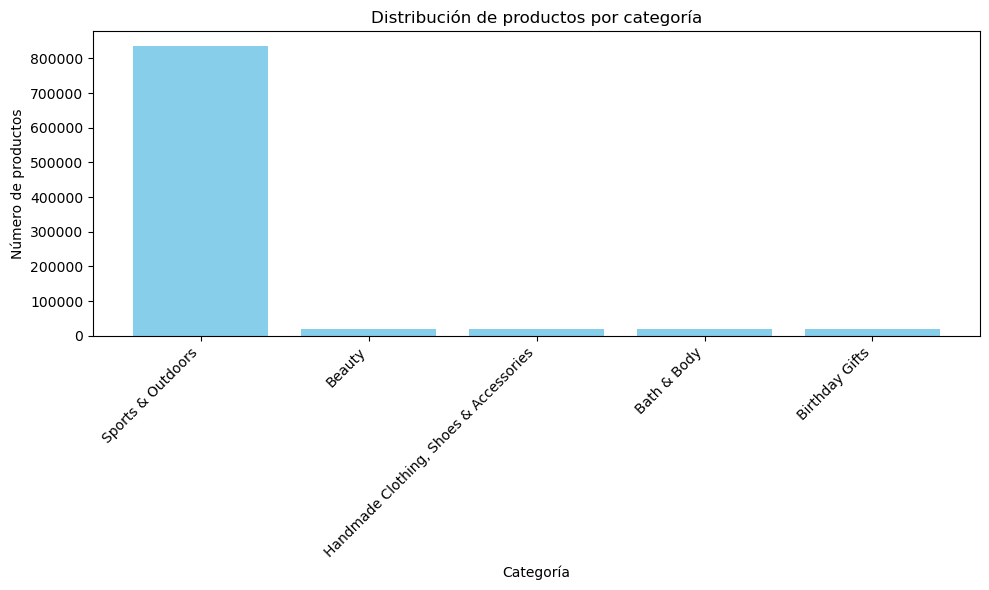

In [5]:
frec_1 = frec.head(5)

plt.figure(figsize=(10, 6))
plt.bar(frec_1['category'], frec_1['count'], color='skyblue')

# Configura los detalles del gráfico
plt.title('Distribución de productos por categoría')
plt.xlabel('Categoría')
plt.ylabel('Número de productos')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mayor claridad

plt.tight_layout()
plt.show()

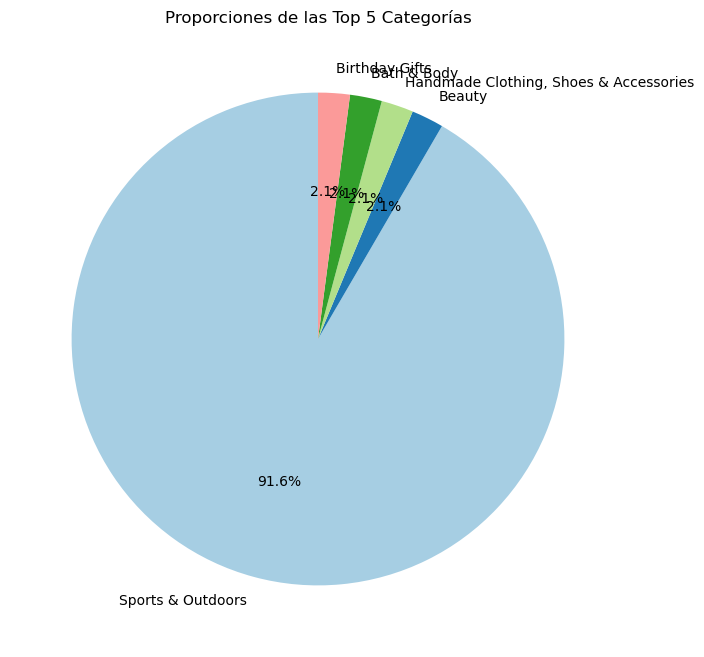

In [6]:
plt.figure(figsize=(8, 8))
plt.pie(frec_1['count'], labels=frec_1['category'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Configura los detalles del gráfico
plt.title('Proporciones de las Top 5 Categorías')

# Muestra el gráfico
plt.show()


### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

--- 
 

In [7]:
resultados_por_categoria = df.groupby('category')['price'].agg(['mean', 'median', lambda x: x.mode().iloc[0]])

# Renombra las columnas para mayor claridad
resultados_por_categoria.columns = ['Media del Precio', 'Mediana del Precio', 'Moda del Precio']

# Imprime los resultados
resultados_por_categoria.head(10)

,Media del Precio,Mediana del Precio,Moda del Precio
category,,,
3D Printers,1018.036129,319.00,499.00
3D Printing & Scanning,99.909599,36.86,313.99
Abrasive & Finishing Products,15.801760,10.49,5.99
Action Cameras,135.418598,60.77,16.99
Adapters,8.750197,7.05,7.99
Agricultural Equipment & Supplies,22.900714,13.99,9.99
Alexa Built-In Devices,223.004579,149.99,29.99
Art & Craft Supplies,15.049922,9.99,8.99
Arts & Crafts,8.182523,5.99,3.99


In [8]:
precio_varianza = df['price'].var()
precio_desviacion = df['price'].std()
precio_rango = df['price'].max() - df['price'].min()
precio_iqr = df['price'].quantile(0.75) - df['price'].quantile(0.25)

In [9]:
print(f'Varianza del precio: {precio_varianza}')
print(f'Desviación estándar del precio: {precio_desviacion}')
print(f'Rango del precio: {precio_rango}')
print(f'Rango intercuartílico (IQR) del precio: {precio_iqr}')

Varianza del precio: 119445.48532256528
Desviación estándar del precio: 345.60886175352226
Rango del precio: 100000.0
Rango intercuartílico (IQR) del precio: 36.0


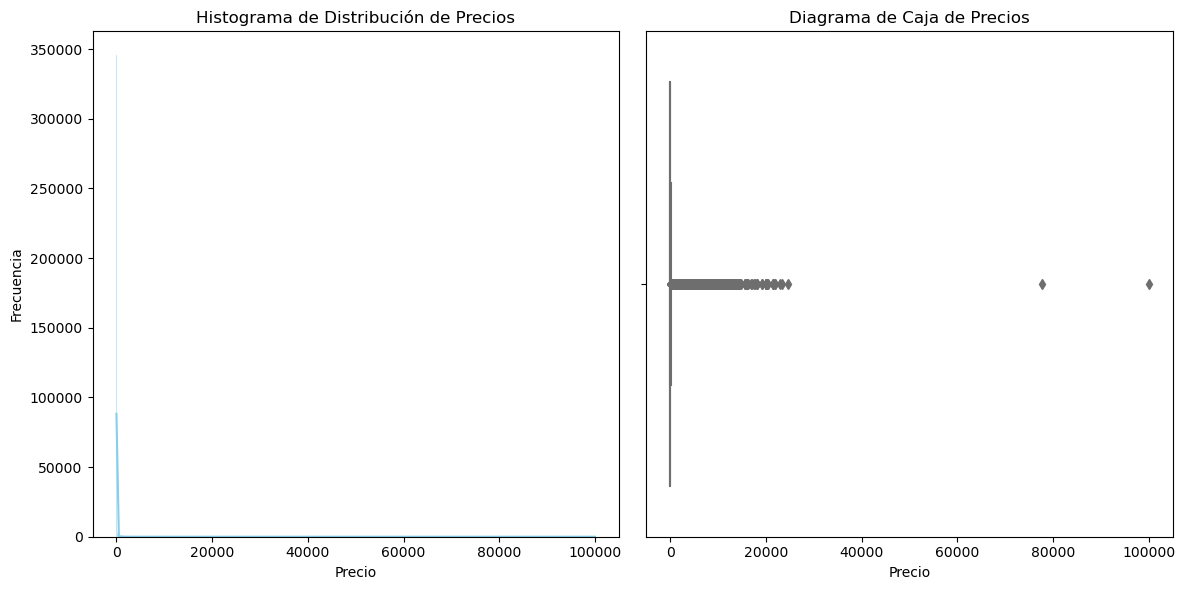

In [10]:
plt.figure(figsize=(12, 6))

# Histograma para visualizar la distribución de precios
plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=30000, kde=True, color='skyblue')
plt.title('Histograma de Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

# Diagrama de caja para mostrar la dispersión y posibles valores atípicos
plt.subplot(1, 2, 2)
sns.boxplot(x=df['price'], color='lightcoral')
plt.title('Diagrama de Caja de Precios')
plt.xlabel('Precio')

# Ajustes de diseño
plt.tight_layout()

# Muestra los gráficos
plt.show()

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

---

In [11]:
calificacion_media = df['stars'].mean()
calificacion_mediana = df['stars'].median()
calificacion_moda = df['stars'].mode()

# Imprime los resultados
print(f'Media de la calificación: {calificacion_media}')
print(f'Mediana de la calificación: {calificacion_mediana}')
print(f'Moda de la calificación: {calificacion_moda[0]}')

Media de la calificación: 2.152836472966065
Mediana de la calificación: 0.0
Moda de la calificación: 0.0


In [12]:
calificacion_varianza = df['stars'].var()
calificacion_desviacion_estandar = df['stars'].std()
calificacion_iqr = df['stars'].quantile(0.75) - df['stars'].quantile(0.25)

# Imprime los resultados
print(f'Varianza de la calificación: {calificacion_varianza}')
print(f'Desviación estándar de la calificación: {calificacion_desviacion_estandar}')
print(f'Rango intercuartílico (IQR) de la calificación: {calificacion_iqr}')

Varianza de la calificación: 4.81743402976196
Desviación estándar de la calificación: 2.1948653785054697
Rango intercuartílico (IQR) de la calificación: 4.4


In [13]:
calificacion_asimetria = df['stars'].skew()
calificacion_curtosis = df['stars'].kurtosis()

# Imprime los resultados
print(f'Asimetría de la calificación: {calificacion_asimetria}')
print(f'Curtosis de la calificación: {calificacion_curtosis}')

Asimetría de la calificación: 0.08120735761080985
Curtosis de la calificación: -1.9260061280432985


In [ ]:
plt.figure(figsize=(10, 6))

# Histograma para visualizar la distribución de las calificaciones
plt.hist(df['stars'], bins=10000, color='skyblue', edgecolor='black')

# Configuración de etiquetas y título del gráfico
plt.title('Histograma de Distribución de Calificaciones de Productos')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')

# Muestra el gráfico
plt.show()